In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
df = pd.read_csv(r"E:\Tài liệu học\2024-2\Nhập môn Học máy và khai phá dữ liệu\Machine_Learning_Project\Data\diabetes_dataset_processed.csv")
df.head(5)

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,...,Alcohol Consumption_Moderate,Smoking Status_Non-Smoker,Smoking Status_Smoker,Environmental Factors_Absent,Environmental Factors_Present,Urine Test_Glucose Present,Urine Test_Ketones Present,Urine Test_Normal,Urine Test_Protein Present,Target
0,1.705261,0.569277,2.197644,0.634773,0.137716,2.197183,0.151527,0.259896,-0.578659,0.479322,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Steroid-Induced Diabetes
1,-0.798037,-1.474156,-1.294096,-1.922277,-1.658739,-1.624429,0.359146,-0.778199,-1.079046,-0.857855,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Neonatal Diabetes Mellitus (NDM)
2,0.499969,0.189103,-0.130183,0.484358,-0.221575,0.139392,-1.156471,-0.051533,0.422114,0.813616,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Prediabetic
3,-1.261610,-1.189026,-1.460369,-0.568545,-0.985068,-0.889503,-0.824281,-0.362961,0.071843,1.565777,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Type 1 Diabetes
4,-0.427178,-1.046461,-1.294096,-0.418130,-1.097347,-0.301563,2.663714,-1.401056,-1.879665,-2.445751,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Wolfram Syndrome


In [3]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])
X = df.drop(columns=['Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': ['balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scoring='precision_macro' để không bỏ sót người bệnh
# scoring='recall_macro' để không muốn dự đoán sai người khỏe mạnh là bị bệnh
# scoring='f1_macro' để cân bằng giữa precision và recall
best_model = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1070
           1       0.89      0.90      0.90      1072
           2       0.94      0.95      0.94      1072
           3       0.95      0.84      0.89      1194
           4       1.00      1.00      1.00      1018
           5       0.95      1.00      0.98      1089
           6       0.78      0.76      0.77      1053
           7       0.81      0.82      0.82      1048
           8       0.85      1.00      0.92      1123
           9       0.90      0.68      0.77      1083
          10       0.80      1.00      0.89      1064
          11       0.99      0.84      0.91      1063
          12       0.86      0.99      0.92      1051

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



In [ ]:
import joblib

model_path = r"E:\Tài liệu học\2024-2\Nhập môn Học máy và khai phá dữ liệu\Machine_Learning_Project\Model\Built_model\randomforest_model.pkl"

joblib.dump(best_model, model_path)

['E:\\Tài liệu học\\2024-2\\Nhập môn Học máy và khai phá dữ liệu\\Diabetes-Assessment-and-Prediction\\Model\\Built_model\\randomforest_model.pkl']

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Tài liệu học\\2024-2\\Nhập môn Học máy và khai phá dữ liệu\\Diabetes-Assessment-and-Prediction\\Result&Visualization\\randomforest_heatmap.png'

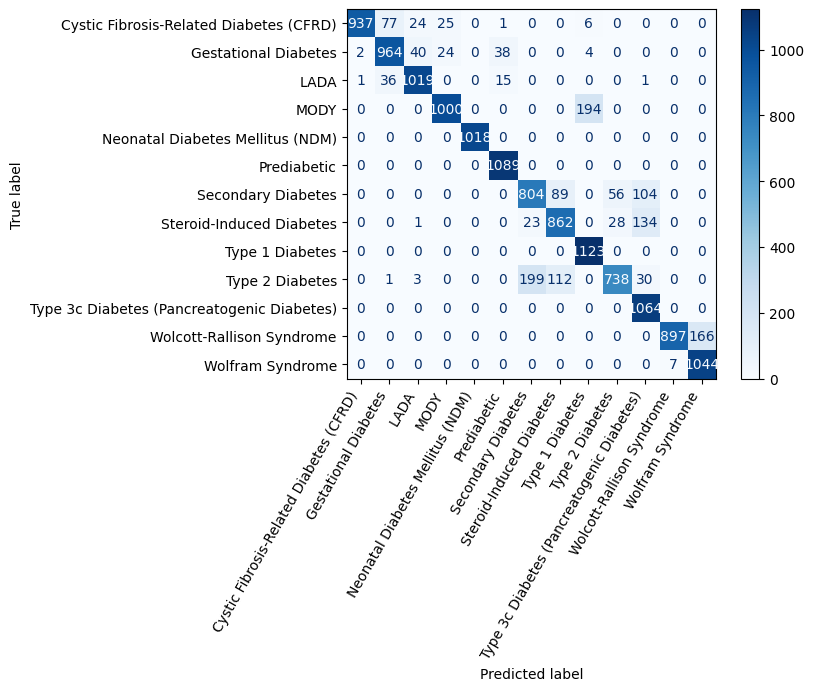

In [ ]:
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=60, ha='right')
plt.savefig(r'E:\Tài liệu học\2024-2\Nhập môn Học máy và khai phá dữ liệu\Machine_Learning_Project\Result&Deploy\Model_result\randomforest_heatmap.png', bbox_inches='tight')  
plt.close()

In [16]:
best_model.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': None,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 300}